# Libraries

In [1]:
import json
import pandas as pd 
import spacy_universal_sentence_encoder
from sklearn import preprocessing
import networkx

In [10]:
def getSample(line):
    sample = {
    'h' : line['h']['name'],
    't' : line['t']['name'],
    'rel' : line['relation']}
    return sample

In [11]:
def loadWiki(wikifile):
    with open(wikifile, "r") as file1:
        lines = file1.readlines()
    
    lines_list = [json.loads(i) for i in lines]
    samples_list = [getSample(i) for i in lines_list]
    
    return samples_list

# Files

In [12]:
wiki80_train = loadWiki("data/wiki80_train.txt") 
wiki80_train_df = pd.DataFrame(wiki80_train)
wiki80_train_df.head()

,h,t,rel
0,tjq,tanjung pandan,place served by transport hub
1,east midlands airport,nottingham,place served by transport hub
2,fort lauderdale-hollywood international airport,"fort lauderdale, florida",place served by transport hub
3,jinnah international airport,karachi,place served by transport hub
4,margaret ekpo international airport,calabar,place served by transport hub


In [13]:
wiki80_test = loadWiki("data/wiki80_val.txt") 
wiki80_test_df = pd.DataFrame(wiki80_test)
wiki80_test_df.head()

,h,t,rel
0,bud frye field,madison,place served by transport hub
1,majors airport,greenville,place served by transport hub
2,hayden field,jackpot,place served by transport hub
3,billy mitchell airport,hatteras,place served by transport hub
4,ercan international airport,northern cyprus,place served by transport hub


In [78]:
wiki80_train_df.shape

(50400, 3)

In [79]:
wiki80_test_df.shape

(5600, 3)

In [2]:
nlp = spacy_universal_sentence_encoder.load_model('en_use_lg')

Downloaded https://tfhub.dev/google/universal-sentence-encoder-large/5, Total size: 577.10MB



# Data Prep

In [14]:
X_train = wiki80_train_df.apply(lambda x: " ".join([x['h'],x['t']]),axis=1)
X_test = wiki80_test_df.apply(lambda x: " ".join([x['h'],x['t']]),axis=1)

In [16]:
%%time

embeddings = [nlp(i).vector for i in X_train]
X_train_embeddings = pd.DataFrame(embeddings)
X_train_embeddings

Wall time: 39min 33s


,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,0.069809,-0.022122,-0.075276,0.116636,-0.006751,-0.072216,-0.048856,0.010309,-0.028912,-0.013474,...,-0.097980,0.008448,0.003500,0.001826,-0.063943,-0.061902,-0.017227,-0.018244,0.041461,-0.063855
1,-0.032339,0.000351,-0.030730,-0.024348,0.052794,-0.059969,-0.012721,-0.016852,-0.078589,0.018819,...,-0.088965,-0.072573,0.068409,-0.044379,-0.084906,0.031593,0.010681,-0.033318,0.041986,-0.067223
2,-0.008244,-0.017852,0.007662,-0.001420,0.091629,-0.127851,-0.028298,0.037827,-0.049267,-0.015625,...,-0.000161,0.004046,0.125001,-0.020417,-0.003670,-0.051928,-0.052636,-0.085646,0.041864,-0.040842
3,0.033394,0.057445,0.035794,0.008640,0.038041,0.028578,-0.065040,-0.054631,-0.006888,-0.028946,...,-0.001581,-0.003894,0.107526,-0.003948,-0.097905,0.017730,-0.008246,-0.058156,0.005424,-0.023795
4,0.033839,0.058121,-0.003422,0.010321,0.078402,0.037689,-0.030078,-0.030379,-0.088188,-0.047200,...,0.005160,0.045873,0.093953,0.009367,0.000861,-0.010325,0.001191,-0.065064,0.016418,0.003949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50395,-0.039301,-0.012155,0.013662,-0.034101,0.005836,-0.051839,0.015391,-0.079284,-0.075091,0.045352,...,-0.052250,0.036831,0.109085,0.023075,0.018663,0.065871,0.004460,0.025593,-0.013252,0.063539
50396,-0.088729,-0.039998,0.000644,0.025694,0.005921,-0.058204,-0.051070,-0.062244,0.017115,0.010568,...,0.020303,0.032911,0.022860,0.028872,-0.016801,-0.007960,-0.035341,-0.005876,0.024732,-0.014725
50397,0.005064,-0.012750,0.020394,0.077665,0.058705,0.000236,-0.036044,-0.015488,-0.036310,-0.034770,...,0.003760,0.034151,0.010689,-0.004404,-0.071268,0.035954,-0.025342,-0.007901,0.026381,0.036720
50398,-0.060210,-0.014074,0.040315,-0.056592,0.010269,-0.090742,-0.042298,0.001645,-0.022019,0.086124,...,0.037582,-0.018768,0.042072,0.012207,0.081392,-0.031119,-0.039548,-0.064636,0.043528,0.065789


In [17]:
%%time

embeddings_test = [nlp(i).vector for i in X_test]
X_test_embeddings = pd.DataFrame(embeddings_test)
X_test_embeddings

Wall time: 4min 11s


,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,-0.053846,-0.004566,-0.013523,-0.027078,-0.016297,0.033873,-0.061185,0.071314,-0.076464,-0.022560,...,-0.066878,-0.121124,0.011552,-0.002694,0.098454,-0.007285,-0.014692,-0.055168,-0.003935,0.015859
1,0.013762,0.069185,-0.018647,-0.018658,0.066329,-0.021318,-0.046676,-0.024408,0.034635,-0.033908,...,-0.072787,-0.095707,0.099151,0.014511,-0.012295,-0.019806,-0.042696,-0.064081,-0.020971,-0.038452
2,0.036003,0.054722,-0.024652,0.016546,0.003652,-0.052719,-0.054762,0.041636,0.044875,0.040583,...,-0.037169,0.005517,0.000235,-0.014530,0.061497,-0.014736,-0.029191,0.062017,0.050663,0.009164
3,0.018087,0.014280,-0.018673,-0.041203,0.018381,-0.091893,-0.076391,-0.056725,-0.041150,-0.035727,...,-0.124280,0.023952,0.099619,-0.007459,0.030569,-0.015714,-0.043923,-0.049726,0.012504,0.010066
4,-0.043524,0.113296,-0.051740,0.031002,0.082061,-0.090276,-0.058621,-0.028332,-0.061901,0.007753,...,-0.037182,0.039015,0.067696,0.011697,0.014698,-0.000332,0.000789,-0.034083,0.029958,0.088393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5595,0.038800,0.042217,-0.051843,-0.018787,0.070903,-0.035647,0.003610,-0.059243,-0.017692,-0.038709,...,0.007207,0.011019,0.065409,-0.037894,-0.093040,0.053984,0.003910,0.009034,-0.005410,-0.084626
5596,0.075769,-0.072770,0.019580,-0.079865,0.057587,0.035631,0.011000,0.034247,-0.000484,0.011663,...,-0.036456,0.053273,0.092737,0.011995,-0.021582,0.004690,-0.017233,0.068338,0.020669,0.009420
5597,0.021131,0.025115,0.043987,0.035623,0.031583,-0.099295,0.051235,-0.037702,0.047133,-0.011548,...,0.023890,-0.028672,0.092326,-0.036267,0.020072,-0.011429,0.003527,0.083524,-0.000020,0.009495
5598,-0.030778,0.010539,0.109560,0.034144,0.072313,0.037943,-0.012764,0.030786,0.024756,-0.095762,...,-0.040874,-0.032103,-0.020802,-0.036139,-0.048201,0.046731,-0.041153,0.055804,0.009692,0.062261


In [20]:
X_train_embeddings.to_pickle("wiki80train_desktop.pkl")
X_test_embeddings.to_pickle("wiki80test_desktop.pkl")

In [22]:
y_train = wiki80_train_df['rel'].values.reshape(-1,1)
y_test = wiki80_test_df['rel'].values.reshape(-1,1)

# Modeling

In [83]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm #SupportVectorMachines
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree #DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import HistGradientBoostingClassifier 
from sklearn.ensemble import GradientBoostingClassifier 

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

In [123]:
from sklearn.metrics import balanced_accuracy_score,precision_recall_fscore_support
import time

In [177]:
def trainModel(model):
    start_time = time.time()
    print("training: ",model['name'])
    
    model_instance = model['model']
    trained_model = model_instance.fit(model['X_train'],model['y_train'])
    
    if(trained_model is None):
        y_pred = model_instance.predict(model['X_test'])
        trained_model = model_instance
    else:
        y_pred = trained_model.predict(model['X_test'])
    
    duration = time.time() - start_time
    print("end of training.")
    return model['name'],duration, trained_model,getMetrics(model['y_test'],y_pred)

In [175]:
def getMetrics(y_test,y_pred):
    precision =precision_recall_fscore_support(y_test,y_pred,average='micro')
    metrics = {
    "accuracy": balanced_accuracy_score(y_test,y_pred),
    "fscore":precision[2],
    "precision":precision[0],
    "recall":precision[1],
    "support":precision[3]
    }
    return metrics

# Training

In [176]:
# model instantiation

svc = {
    "name" : "SVM",
    "model" : svm.SVC(),
    "X_train" : X_train_embeddings,
    "X_test" : X_test_embeddings,
    "y_train" : wiki80_train_df['rel'].values.reshape(-1,1).ravel(),
    "y_test" : y_test
}

sgd = {
    "name" : "SGD",
    "model" : SGDClassifier(loss="hinge", penalty="l2", max_iter=50),
    "X_train" : X_train_embeddings,
    "X_test" : X_test_embeddings,
    "y_train" : wiki80_train_df['rel'].values.reshape(-1,1).ravel(),
    "y_test" : y_test
}

knn = {
    "name" : "KNN",
    "model" : KNeighborsClassifier(n_neighbors=3),
    "X_train" : X_train_embeddings,
    "X_test" : X_test_embeddings,
    "y_train" : wiki80_train_df['rel'].values.reshape(-1,1).ravel(),
    "y_test" : y_test
}

dtc = {
    "name" : "DTC",
    "model" : tree.DecisionTreeClassifier(),
    "X_train" : X_train_embeddings,
    "X_test" : X_test_embeddings,
    "y_train" : wiki80_train_df['rel'].values.reshape(-1,1).ravel(),
    "y_test" : y_test
}

rfc = {
    "name" : "RFC",
    "model" : RandomForestClassifier(n_estimators=10),
    "X_train" : X_train_embeddings,
    "X_test" : X_test_embeddings,
    "y_train" : wiki80_train_df['rel'].values.reshape(-1,1).ravel(),
    "y_test" : y_test
}

etc = {
    "name" : "ETC",
    "model" : ExtraTreesClassifier(n_estimators=100, random_state=0),
    "X_train" : X_train_embeddings,
    "X_test" : X_test_embeddings,
    "y_train" : wiki80_train_df['rel'].values.reshape(-1,1).ravel(),
    "y_test" : y_test
}

mnb = {
    "name" : "MNB",
    "model" : MultinomialNB(),
    "X_train" : scaler.fit_transform(X_train_embeddings),
    "X_test" : scaler.fit_transform(X_test_embeddings),
    "y_train" : wiki80_train_df['rel'].values.reshape(-1,1).ravel(),
    "y_test" : y_test
}

abc = {
    "name" : "ABC",
    "model" : AdaBoostClassifier(n_estimators=100),
    "X_train" : X_train_embeddings,
    "X_test" : X_test_embeddings,
    "y_train" : wiki80_train_df['rel'].values.reshape(-1,1).ravel(),
    "y_test" : y_test
}

lrm = {
    "name" : "LRM",
    "model" : LogisticRegression(multi_class='ovr'),
    "X_train" : X_train_embeddings,
    "X_test" : X_test_embeddings,
    "y_train" : wiki80_train_df['rel'].values.reshape(-1,1).ravel(),
    "y_test" : y_test
}

hgbc = {
    "name" : "HGBC",
    "model" : HistGradientBoostingClassifier(),
    "X_train" : X_train_embeddings,
    "X_test" : X_test_embeddings,
    "y_train" : wiki80_train_df['rel'].values.reshape(-1,1).ravel(),
    "y_test" : y_test
}

gbc = {
    "name" : "GBC",
    "model" : GradientBoostingClassifier(n_estimators=10, learning_rate=1.0, max_depth=1, random_state=0,max_features='log2'),
    "X_train" : X_train_embeddings,
    "X_test" : X_test_embeddings,
    "y_train" : wiki80_train_df['rel'].values.reshape(-1,1).ravel(),
    "y_test" : y_test
}

mlpc = {
    "name" : "MLPC",
    "model" : MLPClassifier(random_state=1, max_iter=100),
    "X_train" : X_train_embeddings,
    "X_test" : X_test_embeddings,
    "y_train" : wiki80_train_df['rel'].values.reshape(-1,1).ravel(),
    "y_test" : y_test
}


models = [svc,sgd,knn,dtc,rfc,etc,mnb,abc,lrm,hgbc,gbc,mlpc]

In [178]:
%%time

results = [trainModel(i) for i in models]

training:  SVM
end of training.
training:  SGD
end of training.
training:  KNN


e:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


end of training.
training:  DTC
end of training.
training:  RFC
end of training.
training:  ETC
end of training.
training:  MNB
end of training.
training:  ABC
end of training.
training:  LRM
end of training.
training:  HGBC
end of training.
training:  GBC
end of training.
training:  MLPC


e:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


end of training.
Wall time: 41min 58s


In [182]:
results_df = pd.DataFrame(results)
#del results_df[2]
results_df

,0,1,2,3
0,SVM,592.535739,SVC(),"{'accuracy': 0.6073214285714286, 'fscore': 0.6..."
1,SGD,24.780312,SGDClassifier(max_iter=50),"{'accuracy': 0.5326785714285714, 'fscore': 0.5..."
2,KNN,12.790060,KNeighborsClassifier(n_neighbors=3),"{'accuracy': 0.5026785714285714, 'fscore': 0.5..."
3,DTC,149.088922,DecisionTreeClassifier(),"{'accuracy': 0.30339285714285713, 'fscore': 0...."
4,RFC,35.549489,"(DecisionTreeClassifier(max_features='auto', r...","{'accuracy': 0.39196428571428565, 'fscore': 0...."
5,ETC,63.833623,"(ExtraTreeClassifier(random_state=209652396), ...","{'accuracy': 0.5189285714285715, 'fscore': 0.5..."
6,MNB,0.633790,MultinomialNB(),"{'accuracy': 0.5014285714285714, 'fscore': 0.5..."
7,ABC,665.533023,"(DecisionTreeClassifier(max_depth=1, random_st...","{'accuracy': 0.16178571428571428, 'fscore': 0...."
8,LRM,184.036227,LogisticRegression(multi_class='ovr'),"{'accuracy': 0.5703571428571429, 'fscore': 0.5..."
9,HGBC,432.084706,HistGradientBoostingClassifier(),"{'accuracy': 0.32125, 'fscore': 0.32125, 'prec..."


In [183]:
results_df['accuracy'] = results_df.apply(lambda x:x[3]['accuracy'],axis=1)
results_df['fscore'] = results_df.apply(lambda x:x[3]['fscore'],axis=1)
results_df['precision'] = results_df.apply(lambda x:x[3]['precision'],axis=1)
results_df['recall'] = results_df.apply(lambda x:x[3]['recall'],axis=1)
del results_df[3]
results_df.columns = ['model','training_time','trained_model','accuracy','fscore','precision','recall']
results_df.sort_values("accuracy",ascending=False)

,model,training_time,trained_model,accuracy,fscore,precision,recall
0,SVM,592.535739,SVC(),0.607321,0.607321,0.607321,0.607321
11,MLPC,184.159551,"MLPClassifier(max_iter=100, random_state=1)",0.592679,0.592679,0.592679,0.592679
8,LRM,184.036227,LogisticRegression(multi_class='ovr'),0.570357,0.570357,0.570357,0.570357
1,SGD,24.780312,SGDClassifier(max_iter=50),0.532679,0.532679,0.532679,0.532679
5,ETC,63.833623,"(ExtraTreeClassifier(random_state=209652396), ...",0.518929,0.518929,0.518929,0.518929
2,KNN,12.790060,KNeighborsClassifier(n_neighbors=3),0.502679,0.502679,0.502679,0.502679
6,MNB,0.633790,MultinomialNB(),0.501429,0.501429,0.501429,0.501429
4,RFC,35.549489,"(DecisionTreeClassifier(max_features='auto', r...",0.391964,0.391964,0.391964,0.391964
9,HGBC,432.084706,HistGradientBoostingClassifier(),0.321250,0.321250,0.321250,0.321250
3,DTC,149.088922,DecisionTreeClassifier(),0.303393,0.303393,0.303393,0.303393


In [185]:
results_df.to_excel("wiki80_evals.xlsx",index=False)

# Application

In [198]:
processed_df = pd.read_excel("processed_df.xlsx")

In [205]:
test_df = processed_df[['url','token','head_title','tail_title']].apply(lambda x:nlp(" ".join([x['head_title'],x['tail_title']])).vector,axis=1)

In [232]:
test_df = pd.DataFrame(pd.DataFrame(test_df)[0].tolist())

In [233]:
svm_y_pred = results[0][2].predict(test_df)
#getMetrics(y_test,svm_y_pred)

In [236]:
articles_results_df = processed_df[['url','token','head_title','tail_title']]
articles_results_df['y_pred'] = svm_y_pred
articles_results_df.to_excel("articles_results_df.xlsx",index=False)
articles_results_df

<ipython-input-236-cf5346c6ed4f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles_results_df['y_pred'] = svm_y_pred


,url,token,head_title,tail_title,y_pred
0,https://newsinfo.inquirer.net/1711061/elderly-...,Image from the BuCor website While awaiting th...,Ferdinand Marcos,Bongbong Marcos,father
1,https://newsinfo.inquirer.net/1710768/doh-sees...,The Department of Health (DOH) said it was re...,Ferdinand Marcos,Bongbong Marcos,father
2,https://newsinfo.inquirer.net/1710775/marcos-r...,PHOTO: President Ferdinand ‘Bongbong’ Marcos ‘...,Bongbong Marcos,Ferdinand Marcos,father
3,https://newsinfo.inquirer.net/1710771/marcos-t...,| PHOTO: official pacebook page of President F...,Bongbong Marcos,José Rizal,father
4,https://newsinfo.inquirer.net/1710429/manila-b...,The agreement will be signed by Foreign Secret...,Enrique Manalo,Wang Yi (politician),occupation
...,...,...,...,...,...
241,https://newsinfo.inquirer.net/1679726/dilg-chi...,Southern Police District director Col. Kirby J...,John Kirby (baseball),John Kraft (academic),sport
242,https://newsinfo.inquirer.net/1679712/doj-chie...,Juanito Jose Diaz Remulla III was arrested by ...,"Juanito (footballer, born 1976)",Benigno Aquino Jr.,participant of
243,https://newsinfo.inquirer.net/1679362/hontiver...,Senator Jose “Jinggoy” Estrada is urging the S...,Jinggoy Estrada,Nancy Binay,head of government
244,https://newsinfo.inquirer.net/1679192/binay-fi...,"During the presidential campaign, President Fe...",Ferdinand Marcos,Bongbong Marcos,father


In [190]:
getMetrics(y_test,y_pred)

{'accuracy': 0.6073214285714286,
 'fscore': 0.6073214285714286,
 'precision': 0.6073214285714286,
 'recall': 0.6073214285714286,
 'support': None}

In [241]:
pd.DataFrame(y_train)[0].value_counts().to_excel("classes.xlsx",index=False)

In [242]:
pd.DataFrame(y_test)[0].value_counts().to_excel("classes1.xlsx",index=False)

In [253]:
pd.DataFrame(y_test)[0].nunique()

80

In [255]:
pd.DataFrame(y_train)[0].value_counts()

competition class                             630
architect                                     630
original language of film or TV show          630
field of work                                 630
successful candidate                          630
                                             ... 
military rank                                 630
member of political party                     630
contains administrative territorial entity    630
characters                                    630
constellation                                 630
Name: 0, Length: 80, dtype: int64

# Network Visualization

In [338]:
import matplotlib.pyplot as plt
import networkx as nx


people_relations = "child,father,followed by,follows,mother,sibling,spouse".split(",")

network_df = articles_results_df.copy()
network_df = network_df[network_df['y_pred'].isin(people_relations)]
network_df = network_df[50:100]

edges = network_df[['head_title','tail_title']].values
labels = network_df[['y_pred']].values

edge_labels = {}
for j,i in enumerate(edges):
    temp = (i[0],i[1])
   
    edge_labels[temp] = labels[j][0]


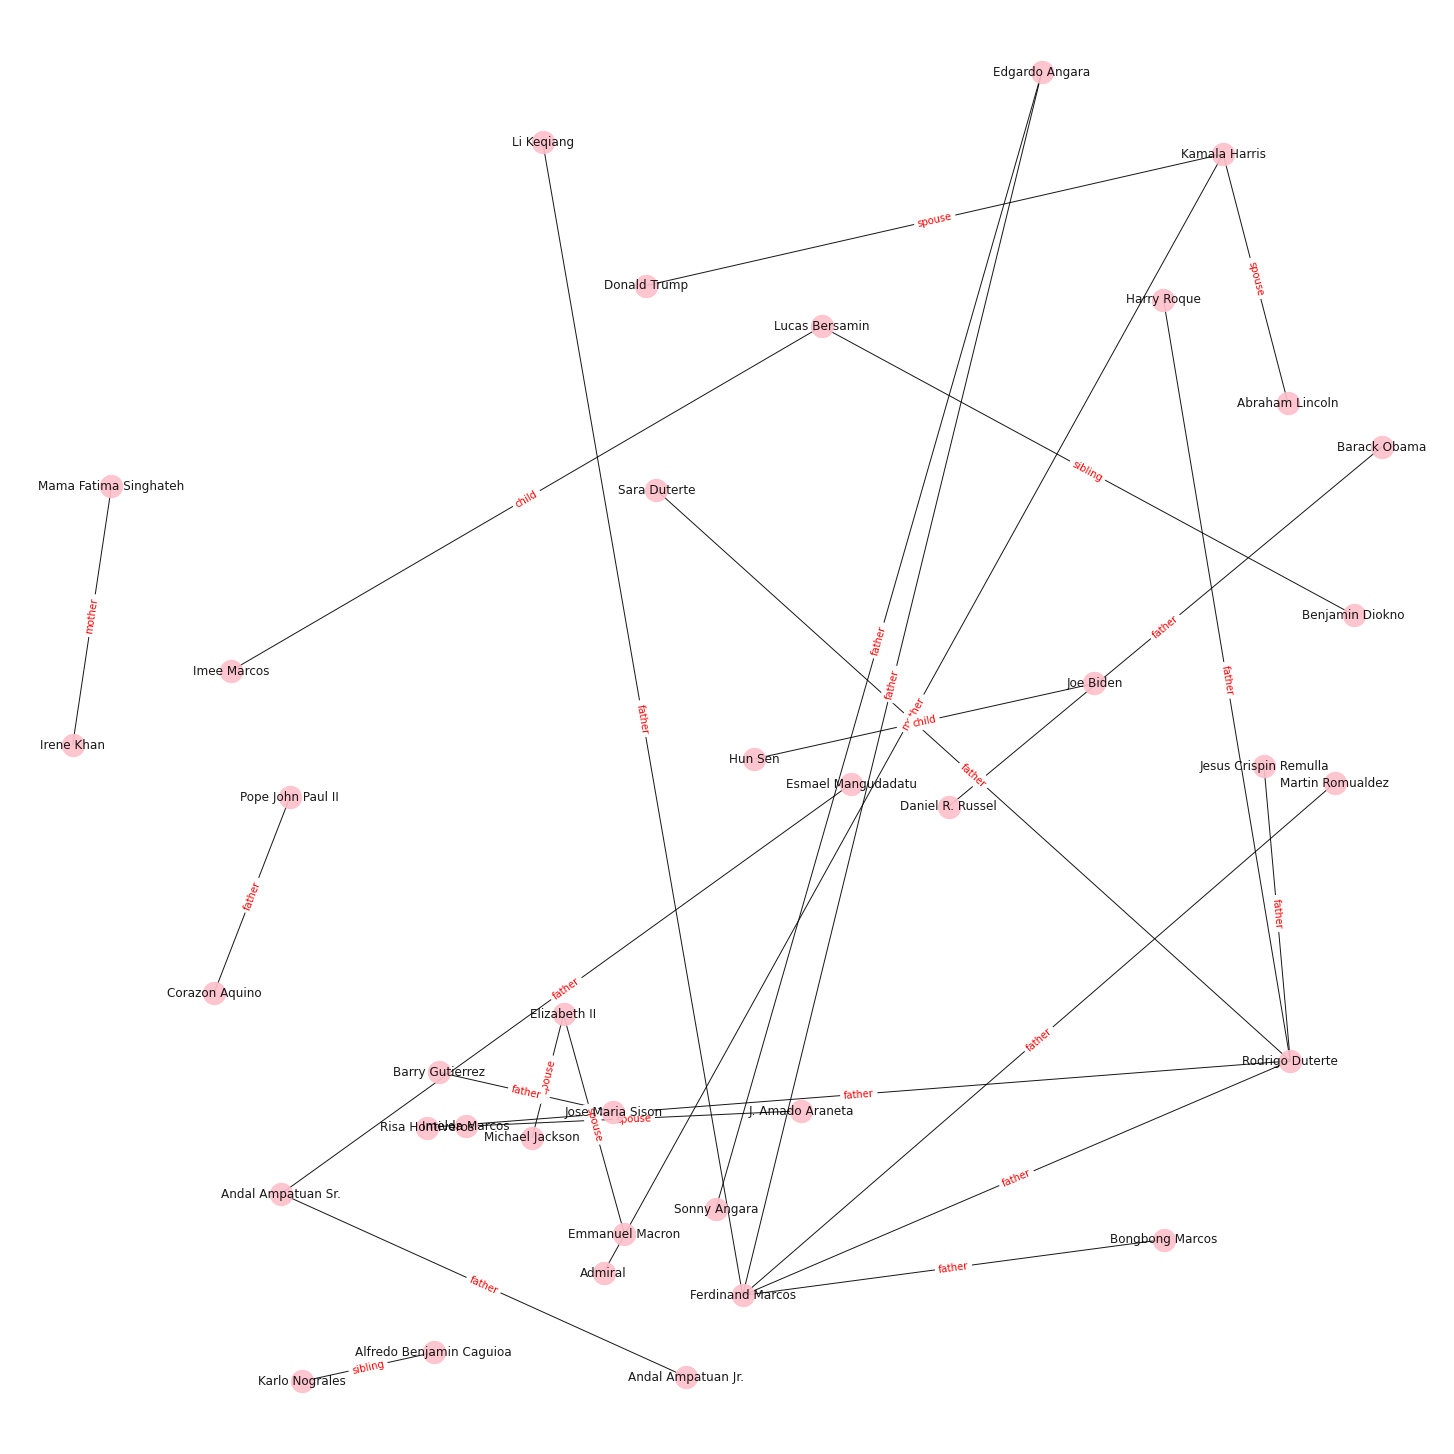

In [341]:
G = nx.Graph()
G.add_edges_from(edges)
pos = nx.random_layout(G)
plt.figure(figsize=(20, 20))
nx.draw(
    G, pos, edge_color='black', width=1, linewidths=1,
    node_size=500,fontsize=5000, node_color='pink', alpha=0.9,
    labels={node: node for node in G.nodes()}
)
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels=edge_labels,
    font_color='red'
)
plt.axis('off')
plt.show()